# Установка библиотек

In [109]:
import pandas as pd #для работы с таблицами

Для автоматического применения статистического критерия (теста) используется модуль `stats` библиотеки `scipy`.

Этот модуль содержит большое количество вероятностных распределений, корреляционные функции и статистические тесты и многое другое.

Также активно используется библиотека `statsmodels`

Для установки библиотеки `scipy` и `statsmodels` можно воспользоваться менеджером пакетов `pip`.

In [110]:
!pip install scipy

In [111]:
!pip install statsmodels


# Загрузка данных

Для скачивания данных используем команду `!wget`. 

Данные появятся в локальной директории.

Мы будем использовать информацию о диаметре пицц разных производителей.

In [112]:
!wget https://raw.githubusercontent.com/harika-bonthu/Hypothesis-test-examples/main/pizzas.csv

zsh:1: command not found: wget


Загрузим данные в память ноутбука.

In [113]:
data = pd.read_csv('Data/pizzas.csv')

In [114]:
data.rename(columns={'Making Unit 1': 'Пиццерия №1', 'Making Unit 2': 'Пиццерия №2'}, inplace=True)

In [115]:
data.head()

,Пиццерия №1,Пиццерия №2
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Проверка данных на нормальность


In [116]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

Установим уровень значимости

In [117]:
alpha = 0.05

## Тест Шапиро-Уилка

In [118]:
from scipy.stats import shapiro

In [119]:
_, p = shapiro(data)
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.204
Данные распределены нормально


## Тест Д’Агостино

In [120]:
from scipy.stats import normaltest

In [121]:
_, p = normaltest(data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация 

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.251
Данные распределены нормально


# Независимый T-тест 

In [122]:
from scipy.stats import ttest_ind

In [123]:
H0 = 'Нет значимой разницы между диаметрами пиццы в разных пиццериях.'
Ha = 'Есть значимая разница между диаметрами пиццы в разных пиццериях.'

Зависимая переменная (диаметр пиццы) является количественной. Группы происходят из разных совокупностей. Следовательно, мы используем независимый T-тест.

In [124]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Пиццерия №1'], data['Пиццерия №2'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.47 > 0.05. Мы не можем отвергнуть нулевую гипотезу. Нет значимой разницы между диаметрами пиццы в разных пиццериях.


-----

# Корреляция Спирмана 

In [125]:
from numpy.random import rand
from scipy.stats import spearmanr

data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)


corr, p = spearmanr(data1, data2)

In [126]:
print(corr,p)

0.8967868287868289 0.0


In [127]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.


# ANOVA тест

In [128]:
from scipy.stats import f_oneway

Однофакторный дисперсионный анализ ANOVA проверяет нулевую гипотезу о том, что две или более групп имеют одинаковое среднее значение генеральной совокупности.

В качестве данных возьмем информацию по размерам раковины мидий, выращенных в разных местах.

In [129]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

In [130]:
_, p = f_oneway(petersburg, magadan, tvarminne)

In [131]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в трех разных местах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в трех разных местах.'

In [132]:
if p>alpha:
  print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
  print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

0.007870900547143829 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в трех разных местах.


_____

# Домашнее задание

Используя информацию по мидиям Петербурга и Магадана, которые представлены в виде двух массивов petersburg и magadan в разделе ANOVA тест, проверьте данные на нормальность и на наличие корреляции. Для этого объедините 2 массива в DataFrame. Обоснуйте выбор теста на корреляцию. Сделайте вывод по гипотезе.
 
 
Также ответьте на вопрос:
Какова разница в среднем размере мидии в зависимости от города-производителя. Обоснуйте выбор теста. Сделайте вывод по гипотезе.


In [135]:
# объединим данные по Санкт-Петербургу и Магадану в один DataFrame
mussels_df = pd.DataFrame(petersburg, columns = ['petersburg'])
mussels_df = mussels_df.join(pd.DataFrame(magadan, columns = ['magadan']), how = 'outer')

# заполним пропуски медианным значением
mussels_df['petersburg'] = mussels_df['petersburg'].fillna(mussels_df['petersburg'].median())

# проверим получившийся DataFrame
mussels_df

,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


In [136]:
# Проверка на нормальность (нормальное распределение)

from scipy.stats import shapiro
from scipy.stats import normaltest

# гипотезы
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

# уровень значимости
alpha = 0.05

# Тест Шапиро-Уилка
_, p = shapiro(mussels_df)
print('p=%.3f' % p)
if p > alpha: print('Тест Шапиро-Уилка:',H0)
else: print('Тест Шапиро-Уилка:',Ha)

# Тест Д’Агостино
_, p = normaltest(mussels_df)
print('p=%.3f' % p[0])
if p[0] > alpha/2: print('Тест Д’Агостино:', H0)
else: print('Тест Д’Агостино:', Ha)

p=0.101
Тест Шапиро-Уилка: Данные распределены нормально
p=0.035
Тест Д’Агостино: Данные распределены нормально


/Users/a.y.macbookair/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Выводы по результатам проверки на нормальность:
Оба теста (Шапиро-Уилка и Д'Агостино) единодушны: данные распределены нормально.

### Нулевая гипотеза
В двух городах средние значения размеров мидий равны.

### Тест на сравнение выборок 
Используем независимый T-тест для сравнении средних значений, т.к. данные распределены нормально, переменные количественные и переменные не зависят друг от друга, сравниваются две группы, количество значений меньше 30

In [138]:
# Тест на сравнение выборок: используем независимый T-тест для сравнении средних значений, 
# т.к. данные распределены нормально, переменные количественные и переменные не зависят друг от друга, 
# сравниваются две группы, количество значений меньше 30

from scipy.stats import ttest_ind

H0 = 'Нет значимой разницы между размерами мидий из разных городов'
Ha = 'Есть значимая разница между размерами мидий из разных городов.'

def t_test(mussels_df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(mussels_df['petersburg'], mussels_df['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha: print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else: print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(mussels_df)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между размерами мидий из разных городов.


### Выводы по результатам независимого T-теста
Есть значимая разница между размерами мидий из разных городов. Нулевая теория опровергнута.

In [157]:
# сравним средние и медианные размеры мидий
display(round(mussels_df['petersburg'].mean() - mussels_df['magadan'].mean(), 4))

0.0252

### Средние значения размеров мидий
Средние значения размеров мидий из Санкт-Петербурга больше на 0,0252, чем из Магадана

### Корреляционный тест
Данные количественные с нормальным распределением - используем тест на коррекляцию Пирсона

<AxesSubplot:>

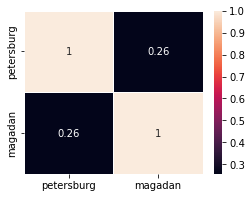

In [166]:
# Построим график корреляции данных (коррекляция Пирсона)
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(mussels_df.corr(), annot=True, linewidths=.5, ax=ax)

In [167]:
# то же самое в табличном отображении
mussels_df.corr()

,petersburg,magadan
petersburg,1.000000,0.256665
magadan,0.256665,1.000000


### Выводы по результатам теста на корреляцию
Связь очень слабая или вовсе отсутсвует.
Гипотеза о связи размеров мидий опровергнута.

### Выводы по домашнему заданию
- Данные распределены нормально
- Есть значимая разница между размерами мидий из разных городов. Нулевая теория опровергнута.
- Связь между размера мидий из разных городов очень слабая или отсутствует.

# Бонус

Скачаем датасет, содержащий информацию по давлению 120 человек.



In [177]:
!wget https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/blood_pressure.csv

zsh:1: command not found: wget


In [178]:
data = pd.read_csv('Data/blood_pressure.csv')

In [179]:
print('Размер выборки: ', data.shape)

Размер выборки:  (120, 5)


In [180]:
data.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


## Z-тест

Проведем Z-тест для проверки двух независимых групп данных на равенство средних значений выборок.

In [181]:
from statsmodels.stats import weightstats

In [182]:
_ ,p = weightstats.ztest(data['bp_before'], x2=data['bp_after'], value=0,alternative='two-sided')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")

0.002162306611369422
Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.


## Z-тест на пропорцию

Z-критерий одной пропорции используется для сравнения наблюдаемой пропорции с теоретической.

В этом тесте используются следующие нулевые гипотезы:

$H_0: p = p_0$ (доля мужчин, предоставивших данные о своем давлении, равна гипотетической пропорции $p_0$)

Альтернативная гипотеза может быть двусторонней, левосторонней или правосторонней:

$H_1 (двусторонний): p ≠ p_0$ (доля мужчин не равна некоторому гипотетическому значению $p_0$)
$H_1 (левосторонний): p < p_0$ (доля мужчин меньше некоторого гипотетического значения $p_0$)
$H_1 (правосторонний): p > p_0$ (доля мужчин больше некоторого гипотетического значения $p_0$)

Предположим, что доля мужчин в нашем датачете равна 40%.

$p_0$: гипотетическая доля мужчин = 0.40

$x$: число мужчин в выборке мужчин: `len(data[data.sex == 'Male'])`

$n$: размер выборки = `len(data)`

Покажем, как использовать функцию `proportions_ztest` для выполнения  **z-теста**:

In [183]:
p_0 = 0.4
n = len(data)
x = len(data[data.sex == 'Male'])

print(n, x)

120 60


In [184]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)

In [185]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу о том, что доля мужчин, предоставивших данные о своем давлении, равна 40%.
